In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [36]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [37]:
type(X_train)

numpy.ndarray

In [38]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [39]:
# printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

<function matplotlib.pyplot.show>

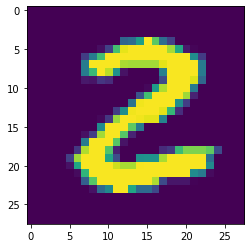

In [40]:
# displaying the image
plt.imshow(X_train[25])
plt.show


In [41]:
# print the corresponding label
print(Y_train[25])

2


In [42]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [43]:
# unique values in Y_train
print(np.unique(Y_train))
# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [44]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [45]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [49]:




# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [50]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2892 - accuracy: 0.9166
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1291 - accuracy: 0.9614
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0947 - accuracy: 0.9715
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0768 - accuracy: 0.9763
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0634 - accuracy: 0.9802
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0555 - accuracy: 0.9824
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0480 - accuracy: 0.9844
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0420 - accuracy: 0.9862
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0380 - accuracy: 0.9874
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.032

In [52]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1050 - accuracy: 0.9732
0.9732000231742859


In [53]:
print(X_test.shape)

(10000, 28, 28)


<function matplotlib.pyplot.show>

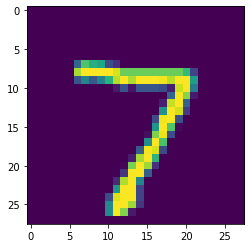

In [55]:
plt.imshow(X_test[0])
plt.show

In [56]:
print(Y_test[0])

7


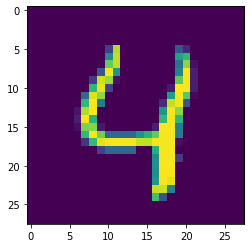

In [57]:
plt.imshow(X_test[4])

In [59]:
print(Y_test[4])

4


In [60]:
Y_pred = model.predict(X_test)

In [62]:
print(Y_pred[0])

[4.9132109e-04 9.4288588e-04 4.8951089e-02 9.7815174e-01 2.5590046e-09
 1.1800095e-04 6.7177222e-11 9.9999928e-01 6.1778128e-03 1.3190776e-02]


In [63]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])

In [64]:
label_for_first_test_image

7

In [65]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [66]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [67]:
print(conf_mat)

tf.Tensor(
[[ 960    1    1    0    1    9    5    2    1    0]
 [   0 1124    1    3    0    1    1    1    4    0]
 [   2    1 1009    4    3    2    3    6    2    0]
 [   0    1    4  980    0   15    0    4    6    0]
 [   1    1    3    0  952    0    5    4    1   15]
 [   2    0    0    6    1  874    2    1    5    1]
 [   1    2    1    0    6   12  932    1    3    0]
 [   1    7    8    2    1    0    0 1001    2    6]
 [   3    1    4    8    3   12    1    6  936    0]
 [   3    5    1    9    9    4    0    8    6  964]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

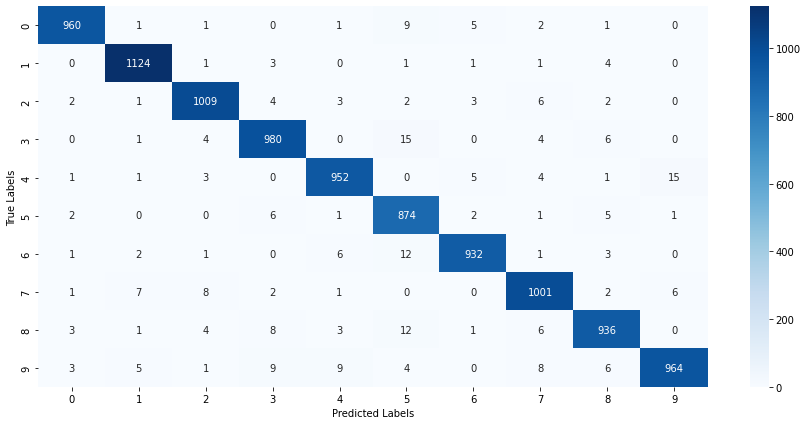

In [68]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [93]:
input_image_path = '/content/MNIST_digit.png'
input_image = cv2.imread(input_image_path)

In [94]:
input_image_path

'/content/MNIST_digit.png'

In [95]:
type(input_image_path)

str

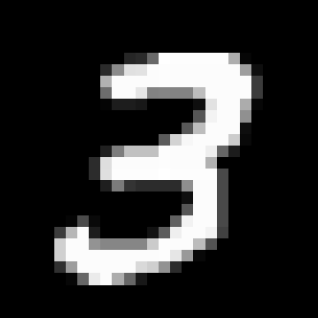

In [96]:
cv2_imshow(input_image)

In [97]:
input_image.shape

(318, 318, 3)

In [100]:
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [101]:
grayscale

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [102]:
grayscale.shape

(318, 318)

In [103]:
input_image_resize =cv2.resize(grayscale,(28,28))

In [104]:
input_image_resize.shape

(28, 28)

In [105]:
cv2_imshow(input_image_resize)

In [106]:
input_image_resize = input_image_resize/255

In [107]:
type(input_image_resize)

numpy.ndarray

In [108]:
image_reshaped  = np.reshape(input_image_resize,[1,28,28])

In [109]:
input_pred = model.predict(image_reshaped)

In [110]:
input_pred

array([[6.5445745e-13, 2.2150565e-05, 1.3258058e-06, 1.0000000e+00,
        6.0738679e-14, 7.4479651e-01, 7.2544144e-21, 7.2622299e-04,
        4.8524141e-04, 3.1098062e-01]], dtype=float32)

In [111]:
input_pred_label = np.argmax(input_pred)

In [112]:
input_pred_label

3

## Predictive System

Path of the image to be predicted: /content/FK0FB.png


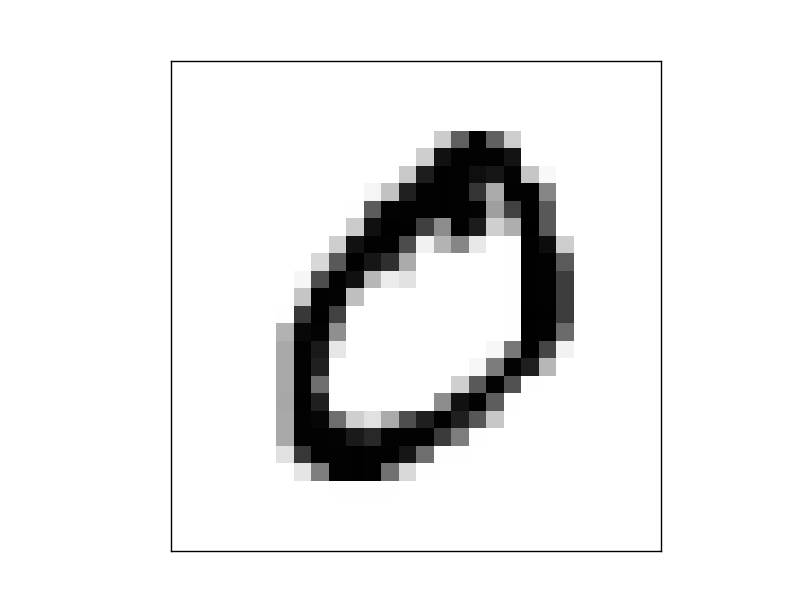

[[1.01185896e-19 2.71957763e-08 1.42776966e-03 9.97568846e-01
  0.00000000e+00 1.00000000e+00 3.20364790e-10 6.35420579e-12
  1.20015231e-13 3.60779413e-22]]
The Handwritten Digit is recognised as  5


In [120]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
img_resize = cv2.resize(grayscale,(28,28))
img_scaled = img_resize/255
img_scaled_shape = np.reshape(img_scaled,[1,28,28])
input_prediction = model.predict(img_scaled_shape)
print(input_prediction)
input_prediction_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_prediction_label)

In [121]:
input_image_path = '/content/1_nlfLUgHUEj5vW7WVJpxY-g.png'
input_image = cv2.imread(input_image_path)

In [122]:
type(input_image)

numpy.ndarray

In [123]:
input_image.shape

(238, 245, 3)

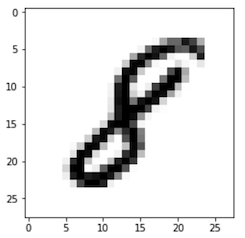

In [124]:
cv2_imshow(input_image)

In [125]:
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [127]:
input_image_resize = cv2.resize(grayscale,(28,28))

In [128]:
input_image_resize.shape

(28, 28)

In [129]:
cv2_imshow(input_image_resize)

In [130]:
input_image_resize1 = input_image_resize/255

In [132]:
image_reshaped = np.reshape(input_image_resize1, [1,28,28])
pred = model.predict(input_image_resize1)

ValueError: ignored